# Project :  Holiday weather Case-Study CapeTown


In this project I am going to use the historic weather data from the Weather Underground for CapeTown to try to predict two good weather weeks to take off as holiday. Of course the weather in the summer of 2016 may be very different to 2014 but it should give some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with CapeTown data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'CapeTown_2014.csv' file which can be found in the project folder. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [24]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd
CapeTown = pd.read_csv('CapeTown_CPT_2014.csv', skipinitialspace=True)

from datetime import datetime

In [25]:
CapeTown.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213<br />
1,2014-1-2,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204<br />
2,2014-1-3,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193<br />
3,2014-1-4,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314<br />
4,2014-1-5,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25<br />


## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [26]:
CapeTown = CapeTown.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [27]:
CapeTown['WindDirDegrees'] = CapeTown['WindDirDegrees'].str.rstrip('<br />')

In [28]:
CapeTown.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm              float64
Mean VisibilityKm             float64
Min VisibilitykM              float64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

and change the values in the `'WindDirDegrees'` column to `float64`:

In [29]:
CapeTown['WindDirDegrees'] = CapeTown['WindDirDegrees'].astype('float64')   

We definitely need to change the values in the `'GMT'` column into values of the `datetime64`  date type.

In [31]:
CapeTown['Date'] = pd.to_datetime(CapeTown['Date'])

We also need to change the index from the default to the `datetime64` values in the `'GMT'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [32]:
CapeTown.index = CapeTown['Date']

In [33]:
CapeTown.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213.0
2014-01-02,2014-01-02,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204.0
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193.0
2014-01-04,2014-01-04,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314.0
2014-01-05,2014-01-05,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25.0


## Finding a summer break

According to meteorologists, summer in CapeTown is between january-february. I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [34]:
summer = CapeTown.loc[datetime(2014,1,1) : datetime(2014,3,19)]

In [35]:
summer.head()

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,28,23,18,19,17,15,88,71,45,...,19.0,14.0,10.0,35,14,NaN,0.0,2.0,NaN,213.0
2014-01-02,2014-01-02,28,23,18,19,18,16,88,74,46,...,26.0,13.0,10.0,32,21,NaN,0.0,2.0,NaN,204.0
2014-01-03,2014-01-03,27,23,19,19,18,18,94,75,48,...,31.0,12.0,3.0,32,26,NaN,0.0,4.0,NaN,193.0
2014-01-04,2014-01-04,27,22,18,19,18,14,88,74,46,...,26.0,13.0,9.0,32,18,NaN,0.0,3.0,NaN,314.0
2014-01-05,2014-01-05,26,22,18,17,16,14,83,70,46,...,26.0,13.0,10.0,45,21,NaN,0.0,4.0,Rain,25.0


I now look for the days with warm temperatures.

In [36]:
summer[summer['Mean TemperatureC'] >= 25]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-21,2014-01-21,31,25,19,18,16,14,78,58,31,...,10.0,10.0,10.0,35,24,45.0,0.0,1.0,NaN,207.0
2014-01-30,2014-01-30,31,26,21,19,17,15,73,59,40,...,31.0,13.0,10.0,37,27,NaN,0.0,1.0,NaN,169.0
2014-01-31,2014-01-31,35,28,20,20,18,15,73,56,28,...,10.0,10.0,10.0,24,13,NaN,0.0,1.0,NaN,205.0
2014-02-14,2014-02-14,33,26,19,20,18,15,83,60,36,...,31.0,14.0,10.0,35,21,NaN,0.0,1.0,NaN,172.0
2014-02-15,2014-02-15,33,28,22,21,19,18,78,64,36,...,26.0,16.0,10.0,34,16,NaN,0.0,1.0,NaN,195.0
2014-02-16,2014-02-16,36,28,20,21,19,17,83,61,38,...,31.0,22.0,10.0,29,18,NaN,0.0,1.0,NaN,202.0
2014-02-17,2014-02-17,29,26,22,21,19,16,88,69,39,...,31.0,14.0,9.0,34,13,NaN,0.0,4.0,NaN,205.0
2014-02-18,2014-02-18,31,27,22,21,20,18,94,68,43,...,31.0,12.0,10.0,42,31,NaN,0.0,1.0,NaN,174.0
2014-02-25,2014-02-25,33,26,19,17,16,14,73,55,30,...,31.0,14.0,10.0,40,26,NaN,0.0,1.0,NaN,158.0


Summer 2014 was rather Warm in this period: .......(Add notes)
So next we tell Jupyter to display any graph created inside this notebook:

In [37]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

<AxesSubplot:xlabel='Date'>

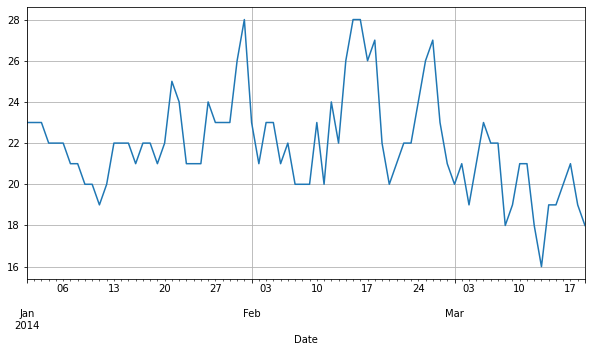

In [38]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the first quarter of the year particularly February to March; looks good for mean temperatures over 25....so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

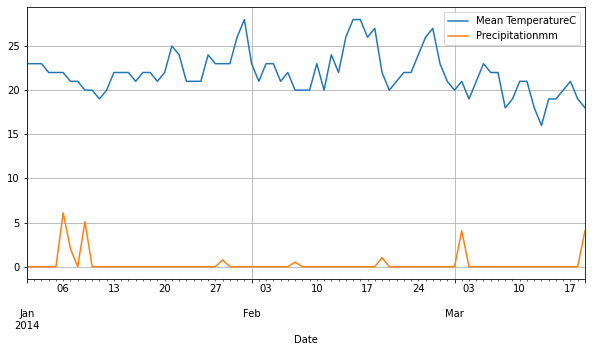

In [39]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The second quarter of the year  is still looking good, Feb to March, the temperetures are still mean and there is no heavy rainfalls

<AxesSubplot:xlabel='Date'>

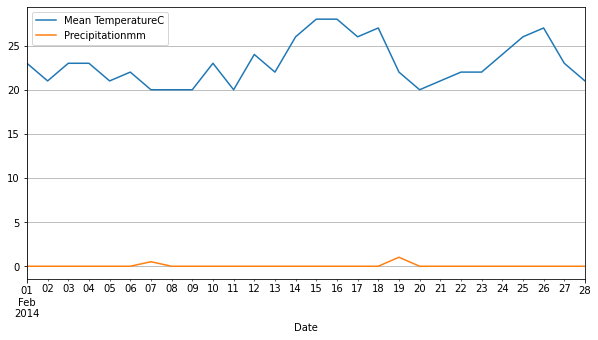

In [40]:
february = summer.loc[datetime(2014,2,1) : datetime(2014,2,28)]
february[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, No significant changes , the weather is overally fair, no rainfall to distrupt daily activity.

## Conclusions

The graphs have shown the consistency of a Capetown summer, a couple of weeks were found when the weather was ideal for vacation in 2014. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years.